In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
import getFamaFrenchFactors as gff
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Define the ticker symbol for Tesla
ticker = 'TSLA'

# Define the start and end dates for the data
start_date = '2016-01-01'
end_date = '2022-01-01'

# Download the data from Yahoo Finance
tsla = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [20]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,15.381333,15.425333,14.600000,14.894000,14.894000,102406500
2016-01-05 00:00:00-05:00,15.090667,15.126000,14.666667,14.895333,14.895333,47802000
2016-01-06 00:00:00-05:00,14.666667,14.670000,14.398667,14.602667,14.602667,56686500
2016-01-07 00:00:00-05:00,14.279333,14.562667,14.244667,14.376667,14.376667,53314500
2016-01-08 00:00:00-05:00,14.524000,14.696000,14.051333,14.066667,14.066667,54421500


In [21]:
data_to_use = tsla['Close'].values

# Data Preprocessing 

## Scaling data

In [22]:
scaler =StandardScaler()

In [23]:
scaled_data =scaler.fit_transform(data_to_use.reshape(-1,1))

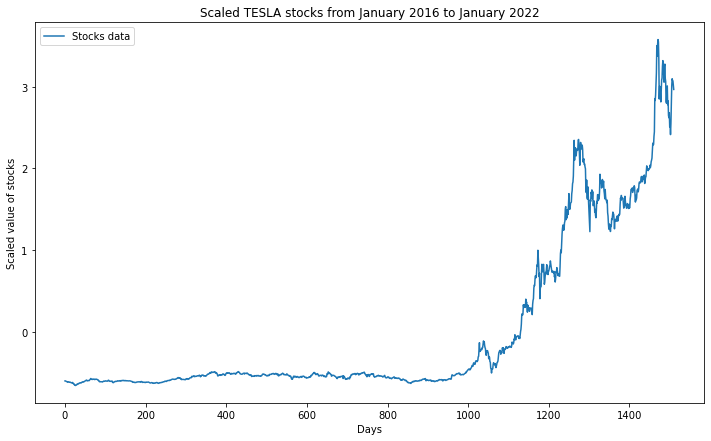

In [24]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Scaled TESLA stocks from January 2016 to January 2022')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')
plt.plot(scaled_data, label='Stocks data')
plt.legend()
plt.show()

In [17]:
from datetime import datetime
date_parser = lambda x: datetime.strptime(x, '%Y:%m:%d')
ads_data = pd.read_excel("ads_index_010622.xlsx", parse_dates=['Date'], date_parser=date_parser)
new_ads_data = ads_data[['Date', 'ADS_INDEX_010622']].set_index('Date')

In [26]:

# Calculate OBV
tsla['daily_return'] = tesla['Adj Close'].pct_change()
tsla['direction'] = np.where(tsla['daily_return'] >= 0, 1, -1)
tsla['direction'][0] = 0
tsla['vol_adjusted'] = tsla['Volume'] * tsla['direction']
tsla['OBV'] = tsla['vol_adjusted'].cumsum()

C:\Users\aishw\AppData\Local\Temp/ipykernel_11884/2553565514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['direction'][0] = 0


In [27]:

sp500 = yf.download('^GSPC', start=start_date, end=end_date)
aapl = yf.download('AAPL', start=start_date, end=end_date)
amzn = yf.download('AMZN', start=start_date, end=end_date)
goog = yf.download('GOOG', start=start_date, end=end_date)
cma = yf.download('CMA', start=start_date, end=end_date)
btc = yf.download('BTC-USD', start=start_date, end=end_date)
eth = yf.download('ETH-USD', start=start_date, end=end_date)
xrp = yf.download('XRP-USD', start=start_date, end=end_date)
ltc = yf.download('LTC-USD', start=start_date, end=end_date)
ada = yf.download('ADA-USD', start=start_date, end=end_date)
vix = yf.download('^VIX', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:

# Calculate additional features
tsla['mom_5_20'] = (tsla['Close'] / tsla['Close'].shift(5)) - 1
tsla['mom_20_100'] = (tsla['Close'] / tsla['Close'].shift(20)) - 1
tsla['mom_60_200'] = (tsla['Close'] / tsla['Close'].shift(60)) - 1

In [32]:
%pip install ta 
from ta.momentum import RSIIndicator
from ta.trend import MACD

Note: you may need to restart the kernel to use updated packages.


In [33]:
bkcn_df = yf.download("BKCN", start_date, end_date)
shsz300_df = yf.download("000300.SS", start_date, end_date)
rsi_indicator = RSIIndicator(close=tsla['Adj Close'], window=14)
macd_indicator = MACD(close=tsla['Adj Close'])

tsla['rsi'] = rsi_indicator.rsi()
tsla['macd'] = macd_indicator.macd()

print(shsz300_df.head())
print(bkcn_df.head())

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BKCN: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
                                  Open         High          Low        Close  \
Date                                                                            
2021-03-11 00:00:00+08:00  5024.560059  5138.410156  5020.580078  5128.220215   
2021-03-12 00:00:00+08:00  5153.669922  5153.669922  5086.819824  5146.379883   
2021-03-15 00:00:00+08:00  5116.120117  5120.879883  4992.399902  5035.540039   
2021-03-16 00:00:00+08:00  5054.410156  5084.310059  5009.950195  5079.359863   
2021-03-17 00:00:00+08:00  5062.770020  5123.549805  5020.129883  5100.859863   

                             Adj Close  Volume  
Date                                            
2021-03-11 00:00:00+08:00  5128.220215  189600  
2021-03-12 00:00:00+08:00  5146.379883  201000  
2021-03-15 00:00:00+08:00  5

In [92]:
# Reset index and convert all dates to same timezones, so they become mergable
for x in [sp500,aapl,amzn,goog,tsla,cma,btc,eth,xrp,ltc,ada,ff_data,vix,new_ads_data,shsz300_df,bkcn_df]:
    if 'Date' in x.columns:
        x.reset_index(inplace=True)
        x['Date'] = pd.to_datetime(x['Date']).dt.date

tsla = ff_data.merge(tsla,on='Date')
tsla = new_ads_data.merge(tsla,on='Date')
    
## CORRECTION - Need to merge FF data according to date here

df_regressor = pd.DataFrame({
    'AAPL_Adj_Close':aapl['Adj Close'].shift(1),
    'XRP_Adj_Close':xrp['Adj Close'].shift(1),
    'LTC_Adj_Close':ltc['Adj Close'].shift(1),
    'ADA_Adj_Close':ada['Adj Close'].shift(1),
    'Fama_French_Mkt_RF':tsla['Mkt-RF'].shift(1), 
    'avg_close_20_days_': tsla['Adj Close'].rolling(window=20).mean().shift(1),
    'avg_Close_50_days':tsla['Adj Close'].rolling(window=50).mean().shift(1),
    'ADS_INDEX': tsla['ADS_INDEX_010622'].shift(1),
#     'bkcn_Adj_Close':bkcn_df['Adj Close'].shift(1),
    'TSLA_RSI': tsla['rsi'].shift(1),
    
})


# Remove any rows with missing data
df_regressor.dropna(inplace=True)
print(df_regressor.head)
print(df_regressor.shape)


scaler = StandardScaler()
X = scaler.fit_transform(df_regressor)
# Split the data into features (X) and target (y)
y = df_regressor['Adj Close']
df_regressor = df_regressor.drop(columns=['Adj Close'],axis=1)
X = df_regressor

ValueError: cannot insert level_0, already exists

In [93]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the data into a Pandas DataFrame
df_regressor = pd.DataFrame({
    'AAPL_Adj_Close':aapl['Adj Close'].shift(1),
    'XRP_Adj_Close':xrp['Adj Close'].shift(1),
    'LTC_Adj_Close':ltc['Adj Close'].shift(1),
    'ADA_Adj_Close':ada['Adj Close'].shift(1),
    'Fama_French_Mkt_RF':tsla['Mkt-RF'].shift(1), 
    'avg_close_20_days_': tsla['Adj Close'].rolling(window=20).mean().shift(1),
    'avg_Close_50_days':tsla['Adj Close'].rolling(window=50).mean().shift(1),
    'ADS_INDEX': tsla['ADS_INDEX_010622'].shift(1),
    'TSLA_RSI': tsla['rsi'].shift(1),
})


In [94]:
# Drop any rows with missing values
df_regressor = df_regressor.dropna()

In [75]:
# Split the data into training and testing sets
train_size = int(len(df_regressor) * 0.8)
train_data = df_regressor[:train_size].values
test_data = df_regressor[train_size:].values

In [76]:
# Normalize the data to improve training performance
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [77]:
# Define the input and output dimensions of the model
input_dim = train_data.shape[1] - 1
output_dim = 1

In [78]:

# Create the training and testing datasets for the RNN model
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]


In [79]:

# Reshape the input data for compatibility with the LSTM layer
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [80]:
# Define the architecture of the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

In [81]:
# Compile the model with an appropriate loss function and optimizer
model.compile(loss='mse', optimizer='adam')

In [82]:

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
37/37 - 2s - loss: 0.1293 - val_loss: 0.0602 - 2s/epoch - 46ms/step
Epoch 2/50
37/37 - 0s - loss: 0.0352 - val_loss: 0.2096 - 111ms/epoch - 3ms/step
Epoch 3/50
37/37 - 0s - loss: 0.0307 - val_loss: 0.0720 - 86ms/epoch - 2ms/step
Epoch 4/50
37/37 - 0s - loss: 0.0298 - val_loss: 0.0440 - 93ms/epoch - 3ms/step
Epoch 5/50
37/37 - 0s - loss: 0.0293 - val_loss: 0.0336 - 86ms/epoch - 2ms/step
Epoch 6/50
37/37 - 0s - loss: 0.0290 - val_loss: 0.0280 - 98ms/epoch - 3ms/step
Epoch 7/50
37/37 - 0s - loss: 0.0286 - val_loss: 0.0269 - 109ms/epoch - 3ms/step
Epoch 8/50
37/37 - 0s - loss: 0.0283 - val_loss: 0.0271 - 113ms/epoch - 3ms/step
Epoch 9/50
37/37 - 0s - loss: 0.0282 - val_loss: 0.0308 - 100ms/epoch - 3ms/step
Epoch 10/50
37/37 - 0s - loss: 0.0279 - val_loss: 0.0290 - 129ms/epoch - 3ms/step
Epoch 11/50
37/37 - 0s - loss: 0.0277 - val_loss: 0.0408 - 126ms/epoch - 3ms/step
Epoch 12/50
37/37 - 0s - loss: 0.0275 - val_loss: 0.0472 - 138ms/epoch - 4ms/step
Epoch 13/50
37/37 - 0s - loss: 

In [84]:
# Evaluate the model on the testing data
mse = model.evaluate(X_test, y_test, verbose=0)
print('Test MSE: %.3f' % mse)

Test MSE: 0.229


In [85]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [89]:
# Scale the predicted and actual outputs back to their original ranges
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

ValueError: non-broadcastable output operand with shape (293,1) doesn't match the broadcast shape (293,9)

In [87]:
# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:,0]))
print('Test RMSE: %.3f' % rmse)

TypeError: Singleton array 0.3258988334261558 cannot be considered a valid collection.